In [14]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata as rd
from scipy.stats.mstats import rankdata as rd2
import glob
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy.stats import rankdata as rd
import scipy.special as special
from scipy.stats import pearsonr
from collections import Counter
import math
from sklearn import datasets, metrics, model_selection, svm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
X_train = pd.read_csv("X_train.csv", index_col=0)
X_test = pd.read_csv("X_test.csv", index_col=0)
Y_train = pd.read_csv("y_train.csv", index_col=0)

In [10]:
# Standardize x_test and x_train
def standardize(data):
    mean = np.mean(data)
    std = np.std(data)
    data_stand = (data - mean) / std
    return data_stand

#Find kNN classifier
def get_clf(num):
    clf=KNeighborsClassifier(n_neighbors=num)
    return clf

#Cross validation scores to predict accuracy, cv=5 or cv=10 
def get_cv_score(clf, num):
    cv_score=cross_val_score(clf, X_train_std, Y_train, cv=num, scoring='roc_auc')
    print cv_score, '\ncv = ', num, ("\nAccuracy: %0.4f (+/- %0.4f)" 
                                     % (cv_score.mean(), cv_score.std() * 2))

#get average cv score only
def get_cv_score_mean(clf, num): 
    cv_score=cross_val_score(clf, X_train_std, Y_train, cv=num, scoring='roc_auc')
    return cv_score.mean()

#Borrowed from Ben's kNN example to format results into matrix, getting ready to submit
def get_mat(results):
    mat = np.zeros(shape=(X_test_std.shape[0], 200))
    for ix, i in enumerate(results):
        for jx, j in enumerate(results[ix]):
            #print j[1]
            mat[jx, ix] = j[1]
    return mat

# Format - Kaggle submission
# Extract the sample and class names from the test submission
y_test_sample=pd.read_csv("y_test_sample.csv", index_col=0)

# build the dataframe with proper index and column names
def format_data(mat):
    results=pd.DataFrame(data=mat, index=y_test_sample.index, columns=y_test_sample.columns)
    return results

In [11]:
X_train_std=X_train.apply(standardize, axis=1) #apply function to each row

In [12]:
X_test_std=X_test.apply(standardize, axis=1)

In [450]:
#Plotting kNN accuracy vs kNN, cv =10
kNN_num=[]
clf_score_avg=[]
i=10
while i <= 300:
    print i
    kNN_num.append(i)
    clf=get_clf(i)
    score_avg=get_cv_score_mean(clf, 10)
    print score_avg
    print
    clf_score_avg.append(score_avg)
    i=i+10

10
0.593471746175556

20
0.6071250851366996

30
0.6142886712262283

40
0.6181019461259287

50
0.6211122315907559

60
0.6227795923036252

70
0.623449599792346

80
0.6237915478808853

90
0.6245619890272176

100
0.6254670661630878

110
0.62562939599834

120
0.6261957672321917

130
0.6253476592918321

140
0.6251272555404337

150
0.6247793999311397

160
0.6257391713054331

170
0.6261848942981599

180
0.6252189958814494

190
0.6253025898934783

200
0.6248398510405759

210
0.6247326135670208

220
0.6249032379221576

230
0.6249487790899131

240
0.6238755651986684

250
0.6242047484924225

260
0.6235230451457976

270
0.62325349411697

280
0.6235274243647829

290
0.6235520624715519

300
0.6238189957989102



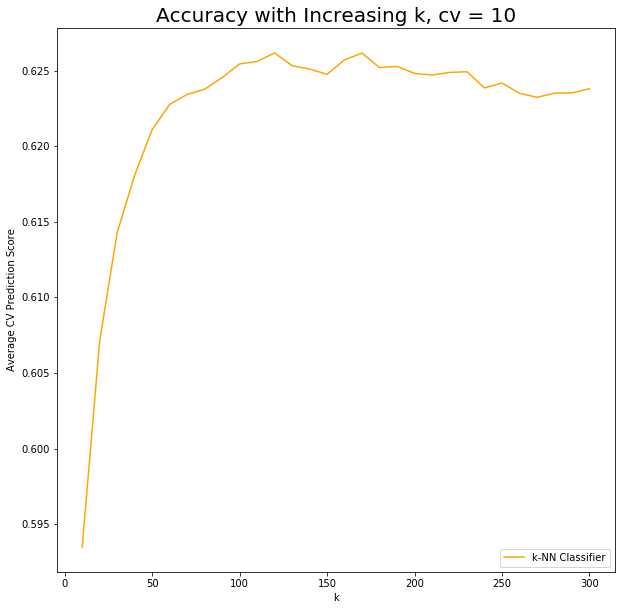

In [456]:
plt.figure(figsize=(10,10))
plt.plot(kNN_num, clf_score_avg, color='orange', label='k-NN Classifier')
#plt.plot(kNN_num, kNN_rand, color='navy',linestyle='--', label='Random Classifier')
plt.xlabel('k')
plt.ylabel('Average CV Prediction Score')
plt.title('Accuracy with Increasing k, cv = 10',fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [457]:
# cv = 5
kNN_num_cv5=[]
clf_score_avg_cv5=[]
i=10
while i <= 300:
    print i
    kNN_num_cv5.append(i)
    clf=get_clf(i)
    score_avg=get_cv_score_mean(clf, 5)
    print score_avg
    print
    clf_score_avg_cv5.append(score_avg)
    i=i+10

10
0.5925056508044281

20
0.604927140247309

30
0.6120762838776618

40
0.6166164311486751

50
0.6191075148251083

60
0.6192132492911027

70
0.6208679789638598

80
0.6207877411613222

90
0.6212034366110497

100
0.6217314355473078

110
0.6219261111260339

120
0.6215828034263123

130
0.6212591432628717

140
0.6209738393799188

150
0.6211670477989488

160
0.6203755022886737

170
0.6208751750098933

180
0.6198094938481333

190
0.6202904783640234

200
0.620315123609363

210
0.6204479663962444

220
0.6194259476658621

230
0.618699696944392

240
0.6182833949209965

250
0.6188599289189551

260
0.6194535160313794

270
0.6190488913067862

280
0.6191645425507658

290
0.6195249735463755

300
0.6188722379292237



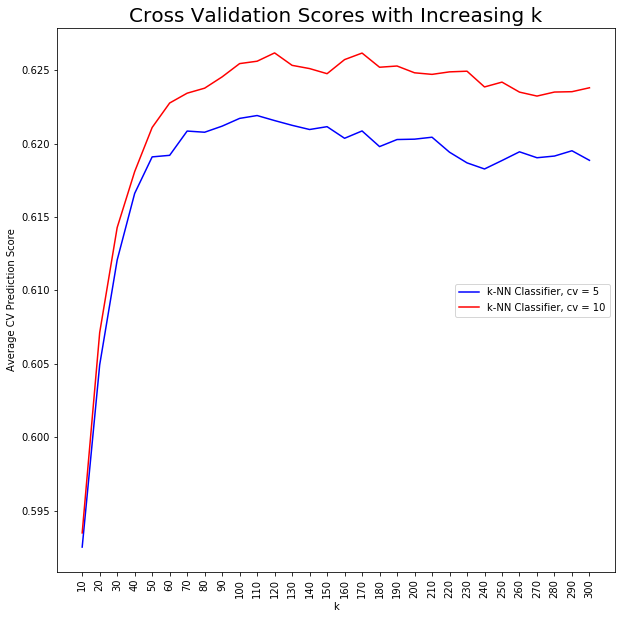

In [702]:
plt.figure(figsize=(10,10))
plt.plot(kNN_num_cv5, clf_score_avg_cv5, color='blue', label='k-NN Classifier, cv = 5')
plt.plot(kNN_num, clf_score_avg, color='red', label='k-NN Classifier, cv = 10')
plt.xlabel('k')
plt.xticks(k60_num, rotation=90)
plt.ylabel('Average CV Prediction Score')
plt.title('Cross Validation Scores with Increasing k',fontsize=20)
plt.legend(loc="center right")
#plt.ylim((0.0,1.0))
plt.show()

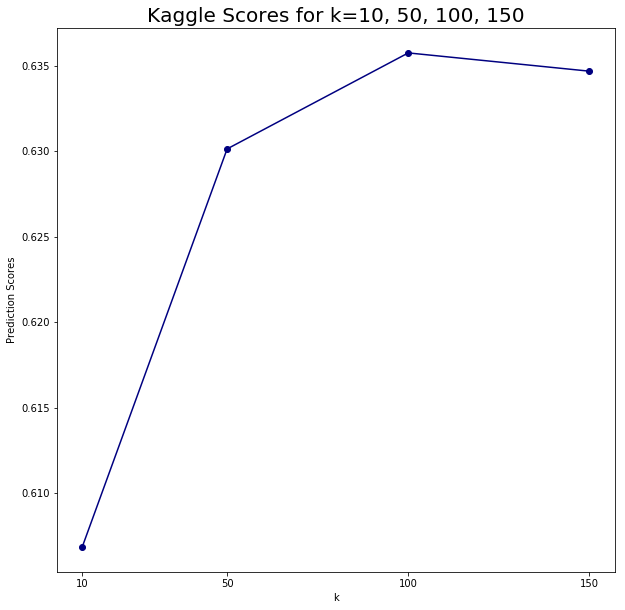

In [725]:

plt.figure(figsize=(10,10))
plt.plot([10,50,100,150],[0.60683,0.63014,0.63576,0.63469], color="navy", label='Kaggle Score', marker='o')
#plt.plot([kNN_num_cv5[0],kNN_num_cv5[4],kNN_num_cv5[9],kNN_num_cv5[14]], [clf_score_avg_cv5[0],clf_score_avg_cv5[4],clf_score_avg_cv5[9],clf_score_avg_cv5[14]], label='k-NN Classifier, cv = 5',linestyle='--',marker='o')
#plt.plot([kNN_num[0],kNN_num[4],kNN_num[9],kNN_num[14]], [clf_score_avg[0],clf_score_avg[4],clf_score_avg[9],clf_score_avg[14]], label='k-NN Classifier, cv = 10', linestyle='--',marker='o')
plt.xlabel('k')
plt.xticks([10,50,100,150])
plt.ylabel('Prediction Scores')
plt.title('Kaggle Scores for k=10, 50, 100, 150',fontsize=20)
#plt.legend(loc="center right")
#plt.ylim((0.0,1.0))
plt.show()

In [469]:
#Get k Classifier
clf_10=get_clf(10)
clf_50=get_clf(50)
clf_100=get_clf(100)
clf_150=get_clf(150)

#Fit data; learn from model
clf_10.fit(X_train_std,Y_train)
clf_50.fit(X_train_std,Y_train)
clf_100.fit(X_train_std,Y_train)
clf_150.fit(X_train_std,Y_train)

#Get Probability Predictions
results_10=clf_10.predict_proba(X_test_std)
results_50=clf_50.predict_proba(X_test_std)
results_100=clf_100.predict_proba(X_test_std)
results_150=clf_150.predict_proba(X_test_std)

#Get matrix, format results, save file
results_10_mat=get_mat(results_10)
knn10_results=format_data(results_10_mat)
knn10_results.to_csv("knn10_results.csv")

results_50_mat=get_mat(results_50)
knn50_results=format_data(results_50_mat)
knn50_results.to_csv("knn50_results.csv")

results_100_mat=get_mat(results_100)
knn100_results=format_data(results_100_mat)
knn100_results.to_csv("knn100_results.csv")

results_150_mat=get_mat(results_150)
knn150_results=format_data(results_150_mat)
knn150_results.to_csv("knn150_results.csv")


In [15]:
#Get k Classifier
clf_124=get_clf(124)

#Fit data; learn from model
clf_124.fit(X_train_std,Y_train)

#Get Probability Predictions
results_124=clf_124.predict_proba(X_test_std)

#Get matrix, format results, save file
results_124_mat=get_mat(results_124)
knn124_results=format_data(results_124_mat)
knn124_results.to_csv("knn124_results.csv")


In [8]:
#Plotting kNN accuracy vs kNN, cv =10
kNN_num=[]
clf_score_avg=[]
i=101
for i in range(101,125):
    print i
    kNN_num.append(i)
    clf=get_clf(i)
    score_avg=get_cv_score_mean(clf, 10)
    print score_avg
    print
    clf_score_avg.append(score_avg)
    i=i+1

101
0.6256470281572228

102
0.6255430492584751

103
0.6256901727967763

104
0.6255132443342115

105
0.6255337901773683

106
0.6256645966756365

107
0.6256860719666922

108
0.6259578314008871

109
0.6257707715115305

110
0.62562939599834

111
0.6261099157083698

112
0.6260815789889831

113
0.625919298889851

114
0.6259593868854396

115
0.6262391060080551

116
0.626245363839555

117
0.6259623869601593

118
0.6256277566436643

119
0.6257692386612637

120
0.6261957672321917

121
0.6259797478430368

122
0.6261397961742977

123
0.6261964180732539

124
0.6265200925566982

